# 1- Convert json files to data frames + Decode the json columns

### Dataframes:

- df_json_withmeta

- df_json_nometa

### Useful Links

**Check json in advance visually**   
 [View "intended" JSON](https://xml-json.kwebpia.net/?state=%7B%22ids%22:%5B%221Mj2srr9nVnj3_-BP2WkWkBdD3PH5qwKe%22%5D,%22action%22:%22open%22,%22resourceKeys%22:%7B%7D%7D)  
  
**Check JSON as table with converter**   
 [Online converter JSON to CSV/Excel](https://www.convertcsv.com/json-to-csv.htm)

### Codes

This part will read all the JSON files from the specified folder and create a DataFrame where each JSON file becomes a row in the DataFrame, and each key-value pair in the JSON file becomes a column in the DataFrame.

In [2]:
# load libraries
import os
import pandas as pd
import json

In [3]:
# Below code helps us to register the consecutive cells automatically into a
# python script whenever we put %%write_and_run Building_Damage-Python.py at the 
# beginning of that cell
from IPython.core.magic import register_cell_magic

@register_cell_magic
def write_and_run(line, cell):
    """write python code into file and execute it as well"""

    argz = line.split()
    file = argz[-1]
    mode = 'w'
    if len(argz) == 2 and argz[0] == '-a':
        mode = 'a'
        print("Appended to file ", file)
    else:
        print('Written to file:', file)
    with open(file, mode) as f:
        f.write(cell.format(**globals()))        
    get_ipython().run_cell(cell)

In [4]:
import pandas as pd

def json_to_dataframe_with_metadata(folder_path):
    '''
    This function converts json files that carry the class labels into
    data frame and at the same time decodes the json column into individual columns
    including the metadata.
    '''
    data = []
    metadata_columns = []  # List to store metadata for each file

    for filename in os.listdir(folder_path):
        if filename.endswith(".json"):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, "r") as file:
                json_data = json.load(file)

                # Extract metadata from the JSON file
                metadata = json_data.get("metadata", {})  # Replace "metadata" with the correct key name for metadata
                metadata_prefixed = {f"metadata_{key}": value for key, value in metadata.items()}
                metadata_columns.append(metadata_prefixed)  # Append metadata to the list

                # Append "lng_lat" data to the data list
                lng_lat = json_data["features"]["lng_lat"]
                for item in lng_lat:
                    properties_prefixed = {f"properties_{key}": value for key, value in item["properties"].items()}
                    item.update(metadata_prefixed)  # Add metadata to each "lng_lat" item
                    item.update(properties_prefixed)  # Add properties with prefix to each "lng_lat" item
                    data.append(item)

    # Create a DataFrame
    df = pd.DataFrame(data)

    return df



In [5]:
#only for training set

folder_path = "/Users/sevincjakab/neuefische_bootcamp/20230717-NewRepo-Capstone-Building_Damage/Capstone_Building_Damage/data/subset/training/labels/"   #<---- adapt the file path here!!!!!!
df_json_withmeta = json_to_dataframe_with_metadata(folder_path)
print(df_json_withmeta)

                                              properties   
0      {'feature_type': 'building', 'uid': 'be9a0ebd-...  \
1      {'feature_type': 'building', 'uid': 'b0ddd757-...   
2      {'feature_type': 'building', 'uid': '2a9b8903-...   
3      {'feature_type': 'building', 'uid': '8ed1f0f8-...   
4      {'feature_type': 'building', 'uid': 'ff6d93c2-...   
...                                                  ...   
46485  {'feature_type': 'building', 'subtype': 'destr...   
46486  {'feature_type': 'building', 'subtype': 'destr...   
46487  {'feature_type': 'building', 'subtype': 'destr...   
46488  {'feature_type': 'building', 'subtype': 'destr...   
46489  {'feature_type': 'building', 'subtype': 'major...   

                                                     wkt metadata_sensor   
0      POLYGON ((-118.7907960354536 34.02599963287881...     WORLDVIEW02  \
1      POLYGON ((-118.7906623432389 34.02600158028667...     WORLDVIEW02   
2      POLYGON ((-118.7913004877881 34.026101961888

In [6]:
# drop the properties column
df_json_withmeta.drop('properties', axis=1, inplace=True) # inplace=True makes sure the original dataframe is changed!

In [7]:
df_json_withmeta.info() 

#properties_subtype has half the number of other cols because only 'post-disaster' images have class name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46490 entries, 0 to 46489
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wkt                           46490 non-null  object 
 1   metadata_sensor               46490 non-null  object 
 2   metadata_provider_asset_type  46490 non-null  object 
 3   metadata_gsd                  46490 non-null  float64
 4   metadata_capture_date         46490 non-null  object 
 5   metadata_off_nadir_angle      46490 non-null  float64
 6   metadata_pan_resolution       46490 non-null  float64
 7   metadata_sun_azimuth          46490 non-null  float64
 8   metadata_sun_elevation        46490 non-null  float64
 9   metadata_target_azimuth       46490 non-null  float64
 10  metadata_disaster             46490 non-null  object 
 11  metadata_disaster_type        46490 non-null  object 
 12  metadata_catalog_id           46490 non-null  object 
 13  m

In [8]:
# # skip

# def json_to_dataframe_with_metadata(folder_path):
#     data = []
#     metadata_columns = []  # List to store metadata for each file

#     for filename in os.listdir(folder_path):
#         if filename.endswith(".json"):
#             file_path = os.path.join(folder_path, filename)
#             with open(file_path, "r") as file:
#                 json_data = json.load(file)

#                 # Extract metadata from the JSON file
#                 metadata = json_data.get("metadata", {})  # Replace "metadata" with the correct key name for metadata
#                 metadata_columns.append(metadata)  # Append metadata to the list

#                 # Append "lng_lat" data to the data list
#                 data.append(json_data["features"]["lng_lat"])

#     # Create a DataFrame for "lng_lat" data
#     flat_data = [item for sublist in data for item in sublist]
#     df = pd.DataFrame(flat_data)

#     # Create a DataFrame for metadata
#     metadata_df = pd.DataFrame(metadata_columns)

#     # Add 'metadata_' prefix to metadata columns
#     metadata_df.columns = [f"metadata_{col}" for col in metadata_df.columns]

#     # Concatenate the "lng_lat" DataFrame and the metadata DataFrame
#     result_df = pd.concat([df, metadata_df], axis=1)

#     return result_df



# #only for training set
# if __name__ == "__main__":
#     folder_path = "/Users/sevincjakab/neuefische_bootcamp/20230717-NewRepo-Capstone-Building_Damage/Capstone_Building_Damage/data/subset/training/labels/"   #<---- adapt the file path here!!!!!!
#     df_json_withmeta = json_to_dataframe_with_metadata(folder_path)
#     print(df_json_withmeta)


In [9]:
# %%write_and_run -a Json_Converter-Python.py
# # skip 
# # Make sure to replace 'path_to_json_files' with the actual path to your folder containing the JSON files. 
# # function to convert json to a df

# def json_to_dataframe_without_metadata(folder_path):
#     data = []
#     for filename in os.listdir(folder_path):
#         if filename.endswith(".json"):
#             file_path = os.path.join(folder_path, filename)
#             with open(file_path, "r") as file: #opens the json
#                 #json.load() function reads the content of the opened 
#                 # JSON file (file) and parses it into Python data structures. 
#                 json_data = json.load(file) 
#                 data.append(json_data["features"]['lng_lat'])

#     flat_data = [item for sublist in data for item in sublist]
#     df = pd.DataFrame(flat_data)
#     return df

# #only for training set
# if __name__ == "__main__":
#     folder_path = "/Users/sevincjakab/neuefische_bootcamp/20230717-NewRepo-Capstone-Building_Damage/Capstone_Building_Damage/data/subset/training/labels/"   #<---- adapt the file path here!!!!!!
#     df_json_nometa = json_to_dataframe_without_metadata(folder_path)
#     print(df_json_nometa)


In [10]:
df_json_withmeta.head(2)
#is each row a building?

,wkt,metadata_sensor,metadata_provider_asset_type,metadata_gsd,metadata_capture_date,metadata_off_nadir_angle,metadata_pan_resolution,metadata_sun_azimuth,metadata_sun_elevation,metadata_target_azimuth,...,metadata_catalog_id,metadata_original_width,metadata_original_height,metadata_width,metadata_height,metadata_id,metadata_img_name,properties_feature_type,properties_uid,properties_subtype
0,POLYGON ((-118.7907960354536 34.02599963287881...,WORLDVIEW02,WORLDVIEW02,1.989496,2018-10-23T18:51:02.000Z,15.396526,0.498313,163.75761,42.6674,333.2746,...,1030010088D86900,1024,1024,1024,1024,MjU3NzkyNg.krKtoByLc6Nrelz_DPpxgNXTvS0,socal-fire_00001298_pre_disaster.png,building,be9a0ebd-ea5c-4127-b510-9545f832283b,NaN
1,POLYGON ((-118.7906623432389 34.02600158028667...,WORLDVIEW02,WORLDVIEW02,1.989496,2018-10-23T18:51:02.000Z,15.396526,0.498313,163.75761,42.6674,333.2746,...,1030010088D86900,1024,1024,1024,1024,MjU3NzkyNg.krKtoByLc6Nrelz_DPpxgNXTvS0,socal-fire_00001298_pre_disaster.png,building,b0ddd757-ba3d-4bbd-b3d2-ddfe4f608f38,NaN


In [11]:
def count_files_in_folder(folder_path):
    file_count = 0
    for _, _, files in os.walk(folder_path):
        file_count += len(files)
    return file_count

In [12]:
# number of files in the 'subset' folder

#holdout
num1 = count_files_in_folder('/Users/sevincjakab/neuefische_bootcamp/20230717-NewRepo-Capstone-Building_Damage/Capstone_Building_Damage/data/subset/holdout/images/')
#test
num2 = count_files_in_folder('/Users/sevincjakab/neuefische_bootcamp/20230717-NewRepo-Capstone-Building_Damage/Capstone_Building_Damage/data/subset/test/images/')
#train
num3 = count_files_in_folder('/Users/sevincjakab/neuefische_bootcamp/20230717-NewRepo-Capstone-Building_Damage/Capstone_Building_Damage/data/subset/training/images/')

print(f"Holdout has {num1} images")
print(f"Test has {num2} images")
print(f"Train has {num3} images")
print(f"There are total of {num1+num2+num3} images")

Holdout has 277 images
Test has 278 images
Train has 816 images
There are total of 1371 images


In [13]:
# # Function to parse json columns
# def parse_json_columns(df, json_columns):
#     for col in json_columns:
#         # Convert strings to dictionaries
#         # df.loc[:, col] = df[col].apply(lambda json_: loads_safe(json_)) # This is where the issue arises
#         # if n > 0:
#         #     print(f"{col!r} has {n} entries containing invalid JSON strings")

#         # Normalize the column and join it to the original DataFrame
#         column_df = pd.json_normalize(df[col])
#         column_df.columns = [f"{col}_{sub_column}" for sub_column in column_df.columns]
#         df = df.drop(columns=[col]).join(column_df)
#     return df

In [14]:
# df_json_withmeta_copy = df_json_withmeta.copy()

# json_cols = ['properties']

In [15]:
# df_json_withmeta_copy = parse_json_columns(df_json_withmeta_copy, json_cols)

# df_json_withmeta_copy.head(2)

In [16]:
# Make a new function to display feature's unique information on top of the df.info()
def show_info(df):
    # Create initial information DataFrame
    info_df = pd.DataFrame(df.dtypes, columns=["Dtype"])
    info_df["Non-Null Count"] = df.count()

    # Add N_unique and Unique columns
    info_df["Unique Count"] = df.nunique()
    info_df["Unique Values"] = df.apply(
        lambda x: dict(x.value_counts()) if x.nunique() < 10 else ""
    )
    # lambda x: x.unique() if x.nunique() < 10 else f'{x.unique().min()} ... {x.unique().max()}')

    # Reset the index
    info_df.reset_index(inplace=True)
    info_df.columns = [
        "Column",
        "Dtype",
        "Non-Null Count",
        "Unique Count",
        "Unique Values",
    ]

    return info_df

In [17]:
# number of rows in this df
df_json_withmeta.shape[0]

46490

In [18]:
show_info(df_json_withmeta)

#why are there 644 unique matadata ids, 
# although there are more than 800 images in train folder?

,Column,Dtype,Non-Null Count,Unique Count,Unique Values
0,wkt,object,46490,46262,
1,metadata_sensor,object,46490,3,"{'WORLDVIEW02': 24329, 'GEOEYE01': 17125, 'WOR..."
2,metadata_provider_asset_type,object,46490,3,"{'WORLDVIEW02': 24329, 'GEOEYE01': 17125, 'WOR..."
3,metadata_gsd,float64,46490,42,
4,metadata_capture_date,object,46490,42,
5,metadata_off_nadir_angle,float64,46490,42,
6,metadata_pan_resolution,float64,46490,42,
7,metadata_sun_azimuth,float64,46490,42,
8,metadata_sun_elevation,float64,46490,42,
9,metadata_target_azimuth,float64,46490,42,


In [19]:
df_json_withmeta['properties_subtype'].unique()

# what is nan?

array([nan, 'no-damage', 'major-damage', 'minor-damage', 'un-classified',
       'destroyed'], dtype=object)

In [20]:
df_json_withmeta.query('properties_subtype == "nan"', engine='python').count()

wkt                             0
metadata_sensor                 0
metadata_provider_asset_type    0
metadata_gsd                    0
metadata_capture_date           0
metadata_off_nadir_angle        0
metadata_pan_resolution         0
metadata_sun_azimuth            0
metadata_sun_elevation          0
metadata_target_azimuth         0
metadata_disaster               0
metadata_disaster_type          0
metadata_catalog_id             0
metadata_original_width         0
metadata_original_height        0
metadata_width                  0
metadata_height                 0
metadata_id                     0
metadata_img_name               0
properties_feature_type         0
properties_uid                  0
properties_subtype              0
dtype: int64

In [21]:
df_json_withmeta.query('properties_subtype == "NaN"', engine='python').count()

wkt                             0
metadata_sensor                 0
metadata_provider_asset_type    0
metadata_gsd                    0
metadata_capture_date           0
metadata_off_nadir_angle        0
metadata_pan_resolution         0
metadata_sun_azimuth            0
metadata_sun_elevation          0
metadata_target_azimuth         0
metadata_disaster               0
metadata_disaster_type          0
metadata_catalog_id             0
metadata_original_width         0
metadata_original_height        0
metadata_width                  0
metadata_height                 0
metadata_id                     0
metadata_img_name               0
properties_feature_type         0
properties_uid                  0
properties_subtype              0
dtype: int64

# 2- Remove the images with un-classified buildings

In [22]:
#check if un-classified buildings belong to the same image
is_same_image = df_json_withmeta[df_json_withmeta['properties_subtype'] == 'un-classified']['metadata_id'].nunique() == 1

if is_same_image:
    print("All 'un-classified' buildings belong to the same image.")
else:
    print("The 'un-classified' buildings do not belong to the same image.")


The 'un-classified' buildings do not belong to the same image.


In [23]:
# check how many images have un-classified buildings --84
df_json_withmeta[df_json_withmeta['properties_subtype'] == 'un-classified']['metadata_id'].nunique()

84

In [24]:
# this function is not working. check again.
def remove_unclassified(df):
    '''
    a function to remove unclassified json files and at the same time the 
    images that correspond to those json file
    '''
# Define the folder path
    folder_path = '/Users/sevincjakab/neuefische_bootcamp/20230717-NewRepo-Capstone-Building_Damage/Capstone_Building_Damage/data/subset/training/images/'

    # Filter the DataFrame and get the rows with 'properties_subtype' != 'un-classified'
    filtered_df = df[~(df['properties_subtype'] == 'un-classified')]

    # Get the list of image filenames to delete
    images_to_delete = filtered_df['metadata_img_name'].tolist()

    # Delete the corresponding images from the folder
    for filename in images_to_delete:
        file_path = os.path.join(folder_path, filename)
        if os.path.exists(file_path):
            os.remove(file_path)

    # Assign the filtered DataFrame back to the original variable if desired
    return filtered_df


In [25]:
df_json_withmeta_copy = df_json_withmeta.copy()

In [26]:
remove_unclassified(df_json_withmeta_copy)
df_json_withmeta_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46490 entries, 0 to 46489
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wkt                           46490 non-null  object 
 1   metadata_sensor               46490 non-null  object 
 2   metadata_provider_asset_type  46490 non-null  object 
 3   metadata_gsd                  46490 non-null  float64
 4   metadata_capture_date         46490 non-null  object 
 5   metadata_off_nadir_angle      46490 non-null  float64
 6   metadata_pan_resolution       46490 non-null  float64
 7   metadata_sun_azimuth          46490 non-null  float64
 8   metadata_sun_elevation        46490 non-null  float64
 9   metadata_target_azimuth       46490 non-null  float64
 10  metadata_disaster             46490 non-null  object 
 11  metadata_disaster_type        46490 non-null  object 
 12  metadata_catalog_id           46490 non-null  object 
 13  m

In [27]:
# number of files in the 'subset' folder after removing images with unclassified buildings

#holdout
num1 = count_files_in_folder('/Users/sevincjakab/neuefische_bootcamp/20230717-NewRepo-Capstone-Building_Damage/Capstone_Building_Damage/data/subset/holdout/images/')
#test
num2 = count_files_in_folder('/Users/sevincjakab/neuefische_bootcamp/20230717-NewRepo-Capstone-Building_Damage/Capstone_Building_Damage/data/subset/test/images/')
#train
num3 = count_files_in_folder('/Users/sevincjakab/neuefische_bootcamp/20230717-NewRepo-Capstone-Building_Damage/Capstone_Building_Damage/data/subset/training/images/')

print(f"Holdout has {num1} images")
print(f"Test has {num2} images")
print(f"Train has {num3} images")
print(f"There are total of {num1+num2+num3} images")

Holdout has 277 images
Test has 278 images
Train has 816 images
There are total of 1371 images


# 3- Data Vis

## 3.1 - Percentage of Class Labels Among Buildings

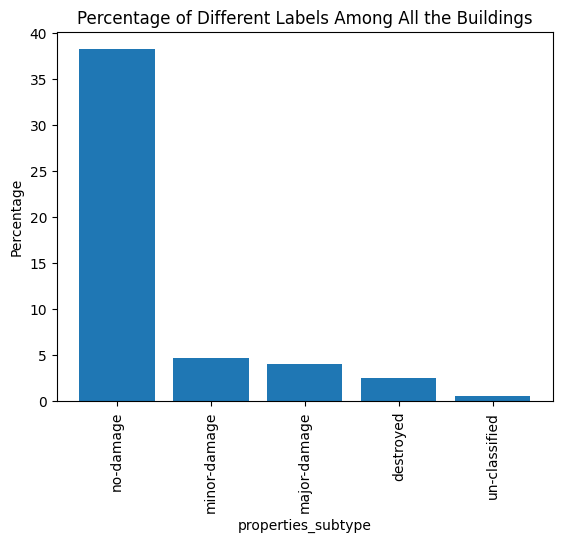

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'properties_subtype' column

# Calculate the value counts and percentages
value_counts = df_json_withmeta['properties_subtype'].value_counts()
percentages = value_counts / len(df_json_withmeta) * 100

# Sort the values in descending order
value_counts = value_counts.sort_values(ascending=False)
percentages = percentages.loc[value_counts.index]

# Create the bar plot
plt.bar(value_counts.index, percentages)
plt.xlabel('properties_subtype')
plt.ylabel('Percentage')
plt.title('Percentage of Different Labels Among All the Buildings')
plt.xticks(rotation=90)
plt.show()


## 3.2 - Distribution of Number of Labels per Image

In [35]:
# Calculate the count of each class label per image
class_counts = df_json_withmeta.groupby('metadata_id')['properties_subtype'].value_counts()

# Calculate the total count of each image
image_counts = df_json_withmeta['metadata_id'].value_counts()

# Calculate the ratio of each class label per image
class_ratios = class_counts / image_counts

print(image_counts)


metadata_id
MjU3ODM0Mw.BlJLwxsBP1cN8i9tCe7jqN9esEE    1188
MjUxNDkyMA.-5_eONZwRP6J6E9ynr435Qx-Hck    1188
MjM1ODM2Mw.fQzUAK2sdJziQGtnkWCFSZHN8s0    1157
MjU4NTg4MA.0eKEtS-TDsWR3ihtb0rP_ZrM8tE    1157
MjUxNDg5Mw.85pmYTKo0nu1BX17CKRZpiXPAfg     895
                                          ... 
MjU3ODc2NA.IyUhBXmy77dWuhePrZ1UTfg0pbM       1
MjU0NjY3MA.SBGrdYFZppulYS91-0NxuK7v6t4       1
MjU4MDczMw.4jQgYLeqLx_y4ZAXyqQy7AIIXdk       1
MjU0NjQ0Mw.DECXrvZyYdGWZ12rLS49jRoqpJk       1
MjM1NDU2NA.l1wprrHcyZ2mh4HahMH_tDdYXEw       1
Name: count, Length: 644, dtype: int64


In [53]:
# check if one image has more than 1 label
unique_labels_per_image = df_json_withmeta.groupby('metadata_id')['properties_subtype'].nunique()
num_labels = pd.DataFrame(unique_labels_per_image)
num_labels

,properties_subtype
metadata_id,
MjE5NzY3NA.G2L233qYhbu1Q5i8-USivIyHucE,0
MjE5NzY4Mg.5e81iZMCb09oBCBBBZhbhl_zRmI,0
MjE5NzY5MA.QeAWZDtqeDAElOJJh6w9-94kn1I,0
MjE5NzYzMQ.9xH295XtUmgcfZA7fZ0s-REIZG0,0
MjE5Nzc2NQ.Nw27ZW3s0F3CCmkrbN4983qk244,0
...,...
MjUyNjgzOQ.TVaFyds3CH-sU3XCHa4yPgKbFl8,3
MjUyNjkxMg.au3VGcczcsOVjfqYaE7LuA-Olfc,2
MjUyNjkxNg.7ST5YXmQu3cZ_QfZLJVtrvCA7Zs,3


In [54]:
#how many different labels per one image 
num_labels['properties_subtype'].unique()

array([0, 4, 2, 1, 5, 3])

In [60]:
# how many images have more than 1 label
num_labels.query('properties_subtype > 1').count()

properties_subtype    206
dtype: int64

In [64]:
#all diaster types  --6
df_json_withmeta['metadata_disaster_type'].nunique()

6

In [61]:
# which disasters have more than 1 class label per image --all 6
# Group the DataFrame by 'metadata_id' and calculate the number of unique class labels per image
unique_labels_per_image = df_json_withmeta.groupby('metadata_id')['properties_subtype'].nunique()

# Filter the DataFrame to include only images with more than one unique label
filtered_df = df_json_withmeta[df_json_withmeta['metadata_id'].isin(unique_labels_per_image[unique_labels_per_image > 1].index)]

# Get the unique types of disaster for the filtered images
unique_disaster_types = filtered_df['metadata_disaster_type'].unique()

print(unique_disaster_types)

['wind' 'tsunami' 'fire' 'flooding' 'earthquake' 'volcano']


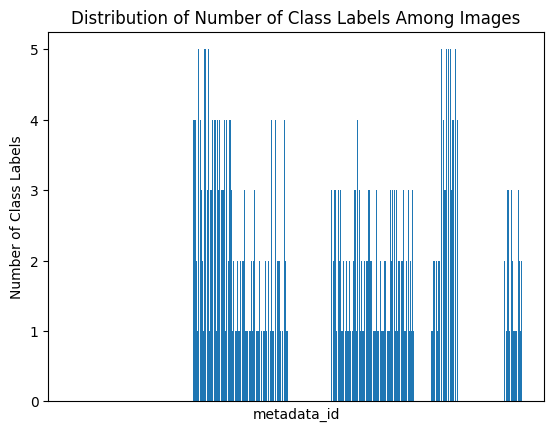

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing 'metadata_id' and 'properties_subtype' columns

# Group the DataFrame by 'metadata_id' and calculate the number of unique class labels per image
class_label_counts = df_json_withmeta.groupby('metadata_id')['properties_subtype'].nunique()

# Create the bar plot
plt.bar(class_label_counts.index, class_label_counts, width =0.8, align ='center')
plt.xlabel('metadata_id')
plt.ylabel('Number of Class Labels')
plt.title('Distribution of Number of Class Labels Among Images')
# Remove x-axis tick labels
plt.xticks([])

plt.show()
plt.show()
